# Data Analysis for Diabetes and the risks factors performances


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv('E:/CV and Cover Letter/Data Analyst job/python challenges/Healthcare/Healthcare Diabetes.csv')

In [87]:
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### Dataset dimension with 2768 records of rows and 10 records of elements

In [10]:
data.shape

(2768, 10)

### Subset / reduce data from 2768 records to 1000 sample records randomly

In [88]:
subset_data = data.sample(n=1000, random_state=42)
subset_data


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1378,1379,3,106,54,21,158,30.9,0.292,24,0
839,840,5,139,64,35,140,28.6,0.411,26,0
2164,2165,9,164,84,21,0,30.8,0.831,32,1
2619,2620,10,101,76,48,180,32.9,0.171,63,0
927,928,17,163,72,41,114,40.9,0.817,47,1
...,...,...,...,...,...,...,...,...,...,...
2114,2115,8,109,76,39,114,27.9,0.640,31,1
2181,2182,1,113,64,35,0,33.6,0.543,21,1
511,512,0,139,62,17,210,22.1,0.207,21,0
1211,1212,8,108,70,0,0,30.5,0.955,33,1


In [117]:
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1378 to 1590
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1000 non-null   int64  
 1   Pregnancies               1000 non-null   int64  
 2   Glucose                   1000 non-null   int64  
 3   BloodPressure             1000 non-null   int64  
 4   SkinThickness             1000 non-null   int64  
 5   Insulin                   1000 non-null   int64  
 6   BMI                       1000 non-null   float64
 7   DiabetesPedigreeFunction  1000 non-null   float64
 8   Age                       1000 non-null   int64  
 9   Outcome                   1000 non-null   int64  
 10  Age_group                 1000 non-null   object 
 11  Result                    1000 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 101.6+ KB


### Dataset with the statistical information like the average for each element, standard deviation, max, min, the lowest percentile, medium and highest percentile

In [25]:
subset_data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1380.640000,3.73400,120.031000,68.697000,20.856000,78.148000,32.412000,0.466427,32.774000,0.335000
std,794.188837,3.31334,31.395887,19.815242,15.949409,112.244024,8.079462,0.320175,11.413641,0.472227
min,8.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,679.750000,1.00000,100.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,1378.000000,3.00000,116.000000,72.000000,23.000000,34.000000,32.300000,0.375000,29.000000,0.000000
75%,2067.250000,6.00000,139.000000,80.000000,32.000000,125.000000,36.800000,0.614250,40.000000,1.000000
max,2768.000000,17.00000,199.000000,122.000000,99.000000,744.000000,80.600000,2.420000,81.000000,1.000000


### Checking if there is any null or empty value in each shell 

In [26]:
subset_data.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Adding new column Result as a representative of Outcome ( 0 = non-diabet and 1 = diabet)

In [115]:
subset_data['Result'] = subset_data['Outcome'].replace({0: 'Non-Diabetic', 1: 'Diabetic'})
subset_data['Result']

1378    Non-Diabetic
839     Non-Diabetic
2164        Diabetic
2619    Non-Diabetic
927         Diabetic
            ...     
2114        Diabetic
2181        Diabetic
511     Non-Diabetic
1211        Diabetic
1590    Non-Diabetic
Name: Result, Length: 1000, dtype: object

In [116]:
subset_data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group,Result
1378,1379,3,106,54,21,158,30.9,0.292,24,0,21-35,Non-Diabetic
839,840,5,139,64,35,140,28.6,0.411,26,0,21-35,Non-Diabetic
2164,2165,9,164,84,21,0,30.8,0.831,32,1,21-35,Diabetic
2619,2620,10,101,76,48,180,32.9,0.171,63,0,56-75,Non-Diabetic
927,928,17,163,72,41,114,40.9,0.817,47,1,36-55,Diabetic


### Grouping Ages into Age_group

In [105]:
def group_ages(age):
    if age <= 20:
        return "0-20"
    elif 21 <= age <= 35:
        return "21-35"
    elif 36 <= age <= 55:
        return "36-55"
    elif 56 <= age <= 75:
        return "56-75"
    else:
        return "76+"

In [110]:
subset_data['Age_group'] = subset_data['Age'].apply(group_ages)

In [111]:
subset_data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group
1378,1379,3,106,54,21,158,30.9,0.292,24,0,21-35
839,840,5,139,64,35,140,28.6,0.411,26,0,21-35
2164,2165,9,164,84,21,0,30.8,0.831,32,1,21-35
2619,2620,10,101,76,48,180,32.9,0.171,63,0,56-75
927,928,17,163,72,41,114,40.9,0.817,47,1,36-55
...,...,...,...,...,...,...,...,...,...,...,...
2114,2115,8,109,76,39,114,27.9,0.640,31,1,21-35
2181,2182,1,113,64,35,0,33.6,0.543,21,1,21-35
511,512,0,139,62,17,210,22.1,0.207,21,0,21-35
1211,1212,8,108,70,0,0,30.5,0.955,33,1,21-35


### Categorize patients based on the Outcome value, 1 is for positive diabetes and 0 is for non-diabetes

In [118]:
positive_diabetes = subset_data[subset_data.Outcome == 1]

In [119]:
positive_diabetes 

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group,Result
2164,2165,9,164,84,21,0,30.8,0.831,32,1,21-35,Diabetic
927,928,17,163,72,41,114,40.9,0.817,47,1,36-55,Diabetic
296,297,2,146,70,38,360,28.0,0.337,29,1,21-35,Diabetic
1655,1656,4,144,82,32,0,38.5,0.554,37,1,36-55,Diabetic
1498,1499,3,130,78,23,79,28.4,0.323,34,1,21-35,Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...
2325,2326,7,195,70,33,145,25.1,0.163,55,1,36-55,Diabetic
1423,1424,2,155,52,27,540,38.7,0.240,25,1,21-35,Diabetic
2114,2115,8,109,76,39,114,27.9,0.640,31,1,21-35,Diabetic
2181,2182,1,113,64,35,0,33.6,0.543,21,1,21-35,Diabetic


In [120]:
diabetes = positive_diabetes.Outcome.count()

In [121]:
diabetes

335

In [122]:
print('There are ' f'{diabetes} patients positive diabetes')

There are 335 patients positive diabetes


In [123]:
negative_diabetes = subset_data[subset_data.Outcome == 0]

In [124]:
negative_diabetes

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group,Result
1378,1379,3,106,54,21,158,30.9,0.292,24,0,21-35,Non-Diabetic
839,840,5,139,64,35,140,28.6,0.411,26,0,21-35,Non-Diabetic
2619,2620,10,101,76,48,180,32.9,0.171,63,0,56-75,Non-Diabetic
450,451,1,82,64,13,95,21.2,0.415,23,0,21-35,Non-Diabetic
368,369,3,81,86,16,66,27.5,0.306,22,0,21-35,Non-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...
937,938,3,111,90,12,78,28.4,0.495,29,0,21-35,Non-Diabetic
931,932,2,100,64,23,0,29.7,0.368,21,0,21-35,Non-Diabetic
2204,2205,5,114,74,0,0,24.9,0.744,57,0,56-75,Non-Diabetic
511,512,0,139,62,17,210,22.1,0.207,21,0,21-35,Non-Diabetic


In [125]:
non_diabetes = negative_diabetes.Outcome.count()

In [126]:
non_diabetes

665

In [127]:
print('There are ' f'{non_diabetes} patients positive diabetes')

There are 665 patients positive diabetes


In [128]:
subset_data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group,Result
1378,1379,3,106,54,21,158,30.9,0.292,24,0,21-35,Non-Diabetic
839,840,5,139,64,35,140,28.6,0.411,26,0,21-35,Non-Diabetic
2164,2165,9,164,84,21,0,30.8,0.831,32,1,21-35,Diabetic
2619,2620,10,101,76,48,180,32.9,0.171,63,0,56-75,Non-Diabetic
927,928,17,163,72,41,114,40.9,0.817,47,1,36-55,Diabetic


### The figure below shows the correlation matrix among all indicators from the DataFrame

In [148]:
correlation_matrix = subset_data.corr()

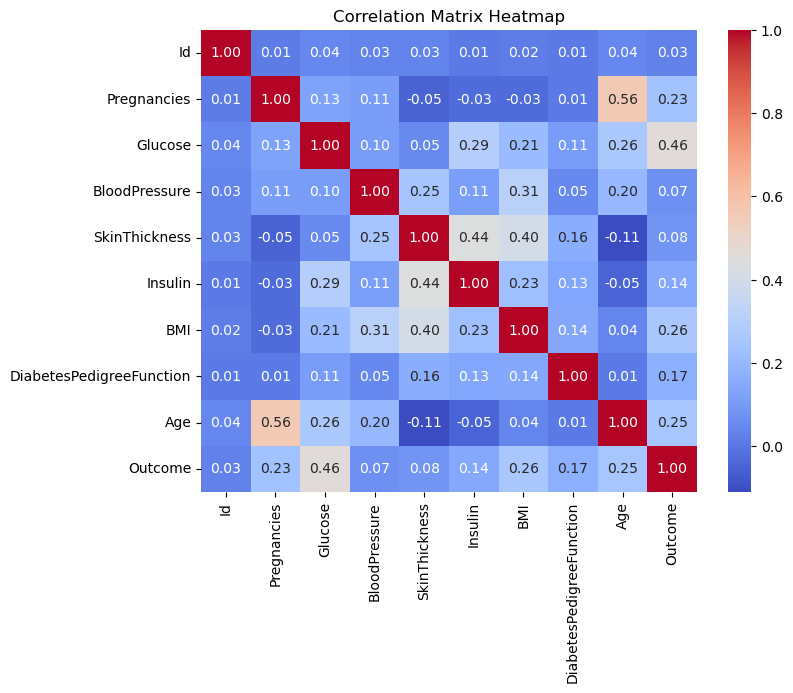

In [149]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Distribution of Number of Pregnancies and the Glucose Level with Regression Plot

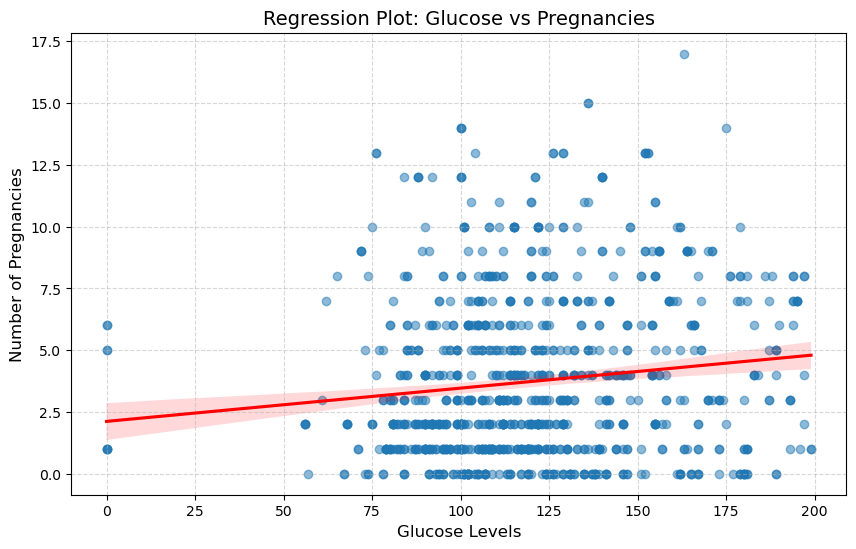

In [43]:
plt.figure(figsize = (10,6))

sns.regplot(x='Glucose', y='Pregnancies', data=subset_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Regression Plot: Glucose vs Pregnancies', fontsize=14)
plt.xlabel('Glucose Levels', fontsize=12)
plt.ylabel('Number of Pregnancies', fontsize=12)

plt.show()

### The presentative of patients with diabetic and non-diabetic related to the number of pregnancies and the blood pressure level

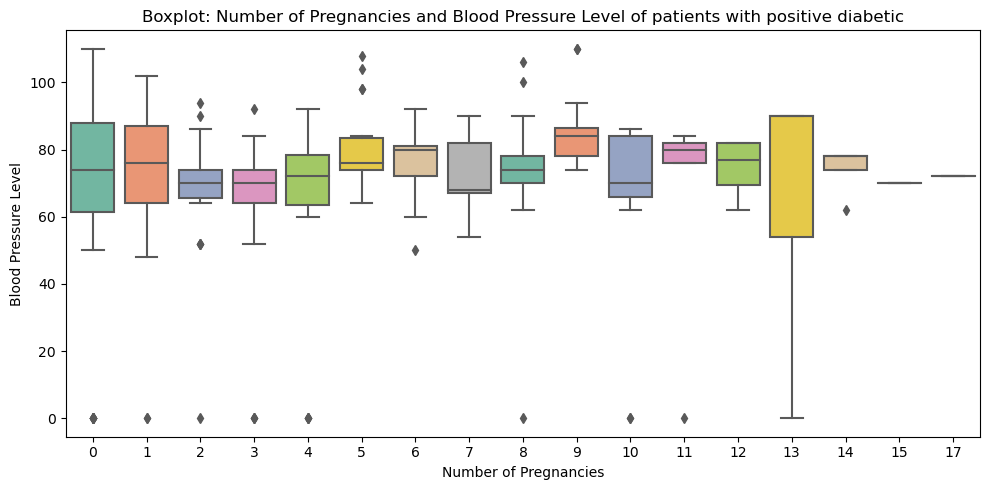

In [83]:

# Boxplot with positive diabetic
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pregnancies', y='BloodPressure', data=positive_diabetes, palette='Set2')

# Add labels and title
plt.xlabel('Number of Pregnancies')
plt.ylabel('Blood Pressure Level')
plt.title('Boxplot: Number of Pregnancies and Blood Pressure Level of patients with positive diabetic')

# Show the plot
plt.tight_layout()
plt.show()


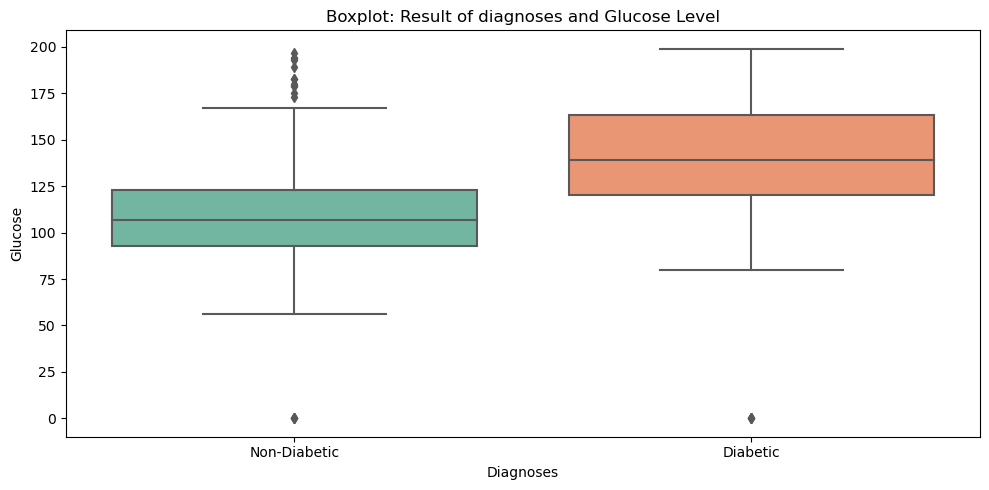

In [154]:
# Boxplot with positive diabetic
plt.figure(figsize=(10, 5))
sns.boxplot(x='Result', y='Glucose', data=subset_data, palette='Set2')

# Add labels and title
plt.xlabel('Diagnoses')
plt.ylabel('Glucose')
plt.title('Boxplot: Result of diagnoses and Glucose Level')

# Show the plot
plt.tight_layout()
plt.show()

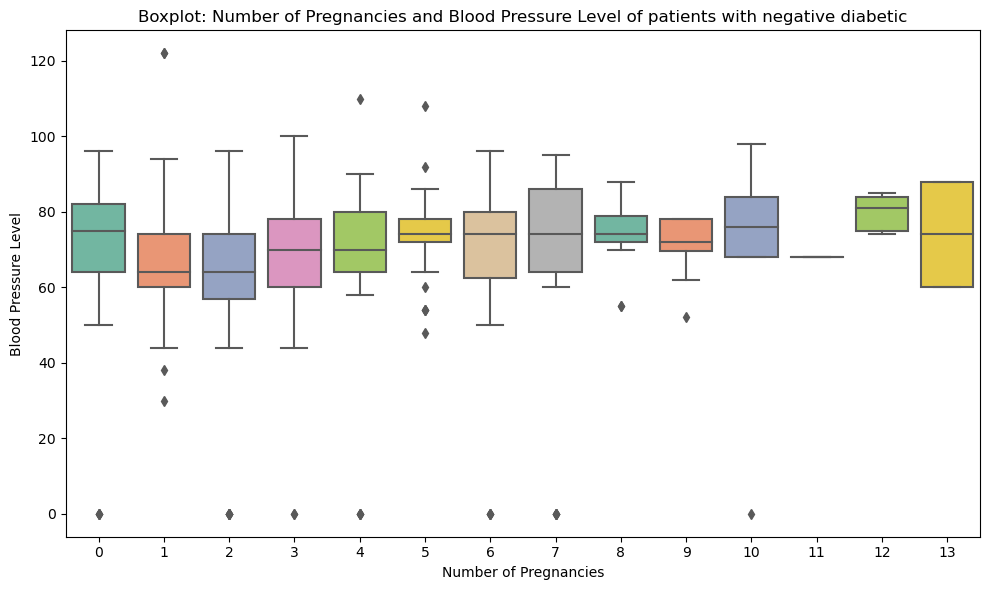

In [85]:
# Boxplot with non-diabetic
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pregnancies', y='BloodPressure', data= negative_diabetes, palette='Set2')

# Add labels and title
plt.xlabel('Number of Pregnancies')
plt.ylabel('Blood Pressure Level')
plt.title('Boxplot: Number of Pregnancies and Blood Pressure Level of patients with negative diabetic')

# Show the plot
plt.tight_layout()
plt.show()


### The bar plot below shows that individuals aged 35 and above begin to experience high blood pressure (over 70 mm Hg), which continues to increase significantly from age 50 and onward. 

NameError: name 'Age_group' is not defined

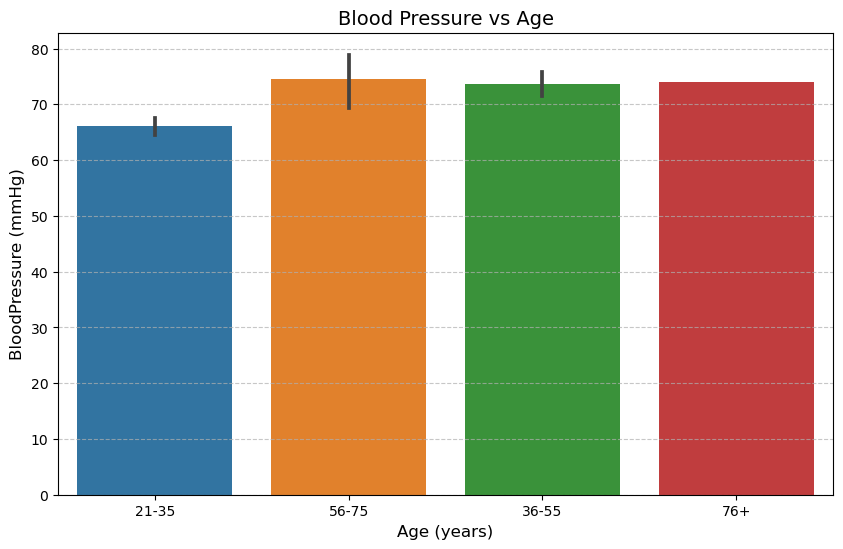

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Age_group', y= 'BloodPressure', data= subset_data)

# Add labels and title
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('BloodPressure (mmHg)', fontsize=12)
plt.title('Blood Pressure vs Age', fontsize=14)


# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for readability
plt.xticks(Age_group)  # Show each age as a tick on the x-axis
plt.yticks(range(110, 170, 10))  # Customize y-axis ticks

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

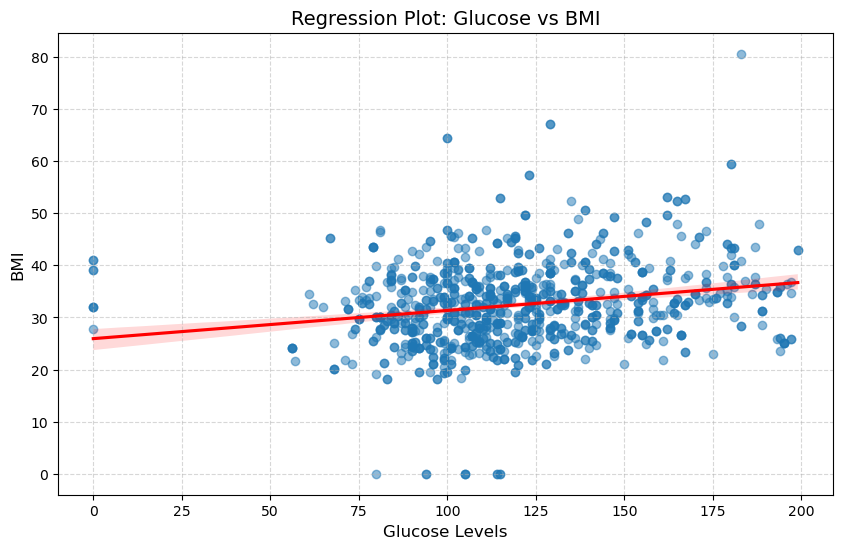

In [52]:
plt.figure(figsize = (10,6))

sns.regplot(x='Glucose', y='BMI', data=subset_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Regression Plot: Glucose vs BMI', fontsize=14)
plt.xlabel('Glucose Levels', fontsize=12)
plt.ylabel('BMI', fontsize=12)

plt.show()

### The box plot depicts that individuals with higher BMI are more likely to be diagnosed with diabetes than those who has lower BMI

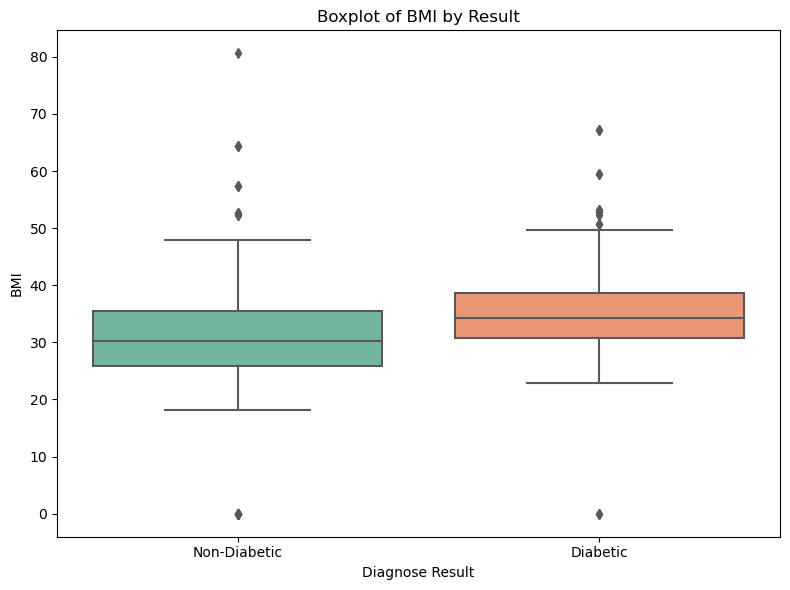

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Result', y='BMI', data=subset_data, palette='Set2')

# Add labels and title
plt.xlabel('Diagnose Result')
plt.ylabel('BMI')
plt.title('Boxplot of BMI by Result')

# Show the plot
plt.tight_layout()
plt.show()


## Bubble chart represents the summarize outcomes between diabetic and non-diabetic patients distincted by BMI categories and their ages

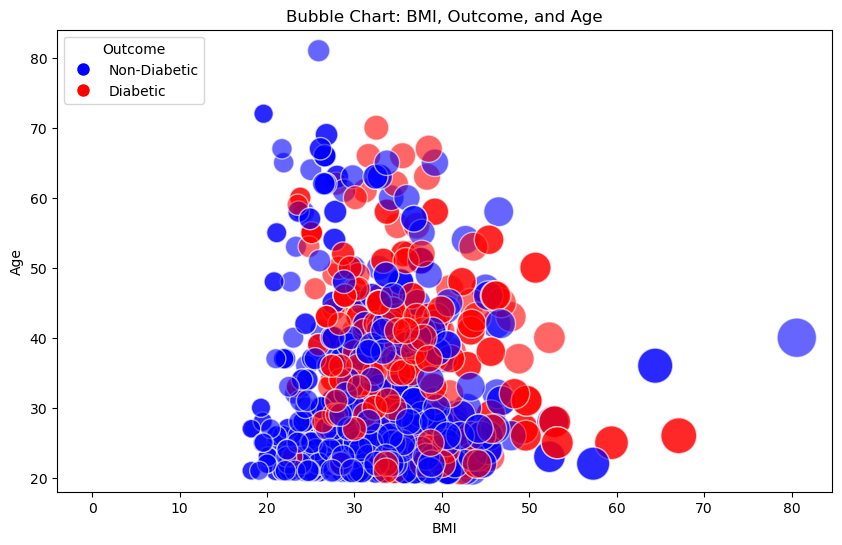

In [48]:
# Create a bubble chart
outcome_colors = {'Non-Diabetic': 'blue', 'Diabetic': 'red'}
subset_data['Color'] = subset_data['Result'].map(outcome_colors)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
   subset_data['BMI'], subset_data['Age'], s=subset_data['BMI']*10, c=subset_data['Color'], alpha=0.6, edgecolors='w'
)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Bubble Chart: BMI, Outcome, and Age')
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Diabetic'),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetic')]
plt.legend(handles=legend_labels, title="Outcome", loc='upper left')
plt.show()

### From the bubble chart above, it is evident that most non-diabetic patients are aged between 20 and 45, with a BMI below 30. While patients aged 35 and above with a BMI over 35 are more frequently diagnosed as diabetic.

In [49]:
subset_data.tail(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Result,Color
1216,1217,0,104,64,37,64,33.6,0.510,22,1,Diabetic,red
2325,2326,7,195,70,33,145,25.1,0.163,55,1,Diabetic,red
931,932,2,100,64,23,0,29.7,0.368,21,0,Non-Diabetic,blue
2204,2205,5,114,74,0,0,24.9,0.744,57,0,Non-Diabetic,blue
1423,1424,2,155,52,27,540,38.7,0.240,25,1,Diabetic,red
2114,2115,8,109,76,39,114,27.9,0.640,31,1,Diabetic,red
2181,2182,1,113,64,35,0,33.6,0.543,21,1,Diabetic,red
511,512,0,139,62,17,210,22.1,0.207,21,0,Non-Diabetic,blue
1211,1212,8,108,70,0,0,30.5,0.955,33,1,Diabetic,red
1590,1591,3,61,82,28,0,34.4,0.243,46,0,Non-Diabetic,blue


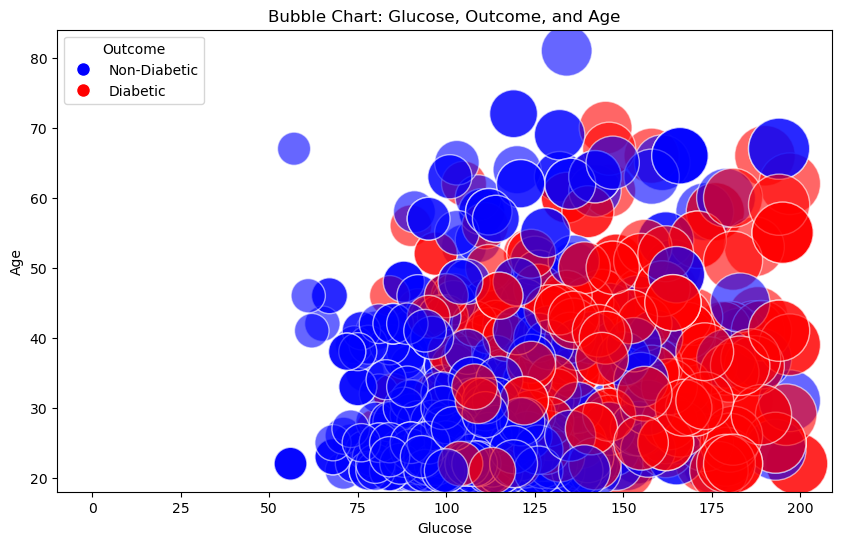

In [51]:
# Create a bubble chart
outcome_colors = {'Non-Diabetic': 'blue', 'Diabetic': 'red'}
subset_data['Color'] = subset_data['Result'].map(outcome_colors)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
   subset_data['Glucose'], subset_data['Age'], s=subset_data['Glucose']*10, c=subset_data['Color'], alpha=0.6, edgecolors='w'
)

# Add labels and title
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Bubble Chart: Glucose, Outcome, and Age')
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Diabetic'),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetic')]
plt.legend(handles=legend_labels, title="Outcome", loc='upper left')
plt.show()

In [146]:
correlation_matrix = subset_data.corr()

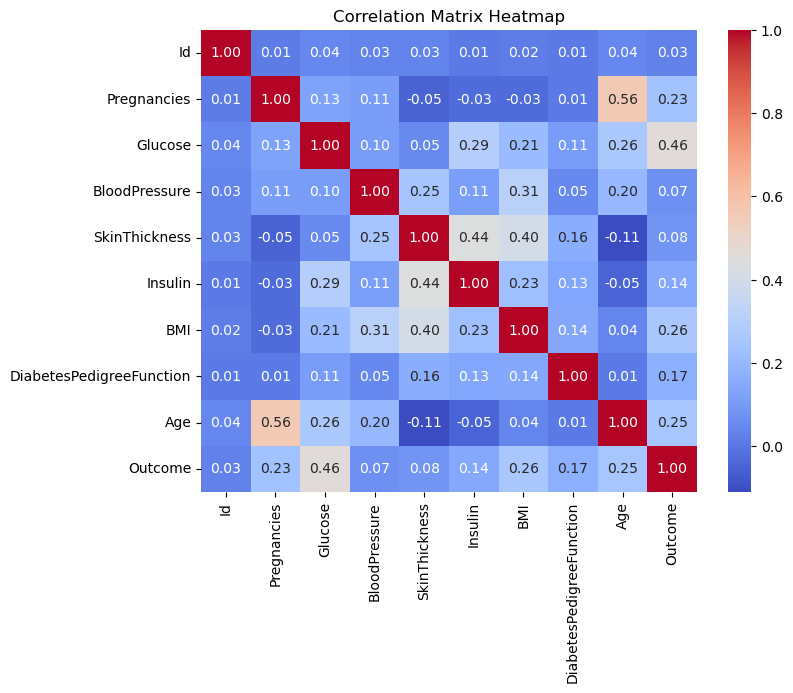

In [147]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()